In [828]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [829]:
# Connect to your database.
conn = sqlite3.connect('/home/sumkin/sumkin-trading/data/trades.db')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

# Number of trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades")
num_trades = cursor.fetchone()[0]

# Number of completed trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0")
num_completed_trades = cursor.fetchone()[0]

# Number of wins.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0 and return > 0")
num_win_trades = cursor.fetchone()[0]

# Win rate.
win_rate = num_win_trades / num_completed_trades

# Average return in pct.
cursor.execute("SELECT AVG(return) FROM cointegration_pair_trades WHERE active = 0")
avg_return = cursor.fetchone()[0]

# Averate return.
cursor.execute("SELECT SUM(return) FROM cointegration_pair_trades WHERE active = 0")
sum_return = cursor.fetchone()[0]

print("num_trades = {}".format(num_trades))
print("num_completed_trades = {}".format(num_completed_trades))
print("num_win_trades = {}".format(num_win_trades))
print("win_rate = {}".format(win_rate))
print("avg_return = {}".format(avg_return))
print("sum_return = {}".format(sum_return))

num_trades = 17
num_completed_trades = 4
num_win_trades = 4
win_rate = 1.0
avg_return = 0.005497742919979377
sum_return = 0.02199097167991751


In [830]:
df = pd.read_sql_query("SELECT * FROM cointegration_pair_trades", conn)
df["enter_dt"] = pd.to_datetime(df["enter_dt"])
df["exit_dt"] = pd.to_datetime(df["exit_dt"])
df["trade_length"] = (df["exit_dt"] - df["enter_dt"]).dt.total_seconds() / 60
df.sort_values("enter_dt", ascending=True, inplace=True)
df[df["active"] == 1].head(5)

,id,symb1,symb2,hedge,coeff,sigma,enter_dt,exit_dt,side,amnt,return_pct,return,active,p1_enter,p2_enter,p1_exit,p2_exit,trade_length
0,417,PF_ADAUSD,PF_SANDUSD,0.350188,-0.019430,0.001575,2025-10-10 17:01:38,NaT,BUY,1.225746,NaN,NaN,1,0.81583,0.27080,NaN,NaN,NaN
10,427,PF_TIAUSD,PF_VIRTUALUSD,0.982477,-0.348917,0.010246,2025-10-10 17:01:38,NaT,SELL,0.682128,NaN,NaN,1,1.46600,1.07330,NaN,NaN,NaN
9,426,PF_CRVUSD,PF_PNUTUSD,0.307110,-0.018288,0.004042,2025-10-10 17:01:38,NaT,SELL,1.331026,NaN,NaN,1,0.75130,0.20553,NaN,NaN,NaN
7,424,PF_TRXUSD,PF_MELANIAUSD,1.160720,-0.217083,0.001837,2025-10-10 17:01:38,NaT,BUY,2.973447,NaN,NaN,1,0.33631,0.17610,NaN,NaN,NaN
6,423,PF_TRXUSD,PF_POPCATUSD,2.062870,-0.467726,0.003360,2025-10-10 17:01:38,NaT,BUY,2.973447,NaN,NaN,1,0.33631,0.23223,NaN,NaN,NaN


# Return percentage distribution

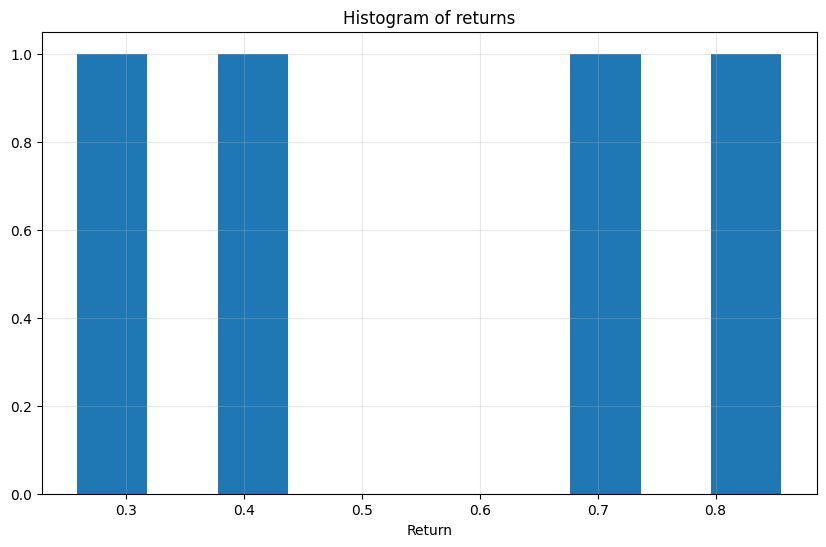

In [831]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["active"] == 0]["return_pct"])
plt.xlabel("Return")
plt.title("Histogram of returns")
plt.grid(True, alpha=0.3)
plt.show()

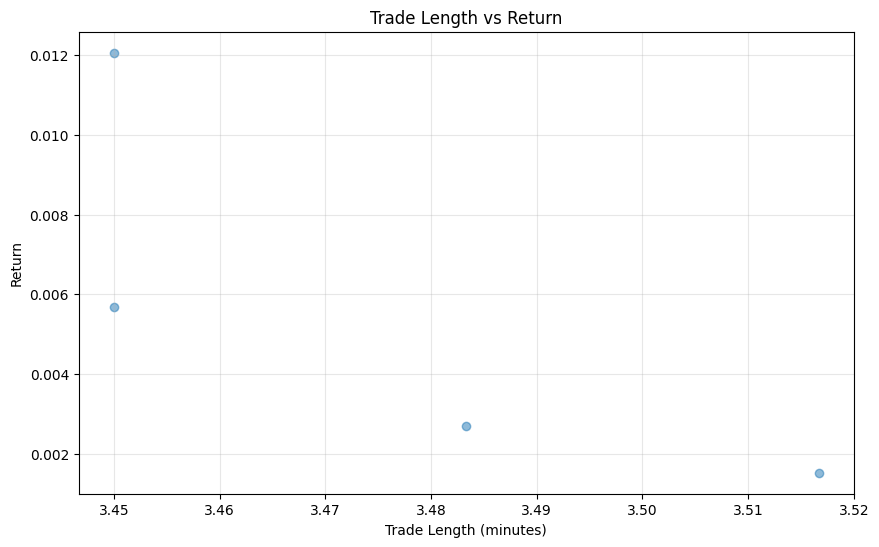

In [832]:
plt.figure(figsize=(10, 6))
plt.scatter(df["trade_length"], df["return"], alpha=0.5)
plt.xlabel("Trade Length (minutes)")
plt.ylabel("Return")
plt.title("Trade Length vs Return")
plt.grid(True, alpha=0.3)
plt.show()

#### 